In [39]:
from pylegoclassifier import NaiveBayes, MatlabSurrogate, ImageProcess
from os import listdir
from os.path import isfile, join
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import morphology
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from seaborn import heatmap

# load class instances
matlab = MatlabSurrogate()
imageproc = ImageProcess()

class_dict = {0:"medium_blue",
              1:"black",
              2:"dark_stone_gray",
              3:"bright_green",
              4:"med_yel_green",
              5:"bright_orange",
              6:"bright_red",
              7:"bright_blue",
              8:"white",
              9:"bright_yellow"}


# get our raw images into a list
raw_img_path = "images/kinect_validate/"
lego_imgs = [(raw_img_path + f) for f in listdir(raw_img_path) if isfile(join(raw_img_path, f))]
print(f"there are {len(lego_imgs)} lego images in list")
print(lego_imgs)

# get the validation results
val_df = pd.read_csv("121820_final_validation_data_hand.csv")

# all the y val in a vector
y_val_all = val_df.loc[:,'color'].to_numpy()
print(len(y_val_all))

# load the images
nb_model1 = imageproc.load_model('nb_classifier2.sav')
nb_model2 = imageproc.load_model('nb_classifier_2ndgen.sav')

# for results
gen1_acc_list = []
gen1_prec_list = []
gen1_rec_list = []
gen2_acc_list = []
gen2_prec_list = []
gen2_rec_list = []

gen1_pred_list = []
gen2_pred_list = []

image processor activated! use 'process_image_to_df()' to get back a pandas df
there are 3 lego images in list
['images/kinect_validate/Sample1.jpg', 'images/kinect_validate/Sample13.jpg', 'images/kinect_validate/Sample3.jpg']
43


In [40]:
for idx in range(len(lego_imgs)):
    # acquire image
    lego_img = matlab.acquire_kinect_image(lego_imgs[idx])
    
    # load validation information for this image
    file_fragment = lego_imgs[idx].split(".")[0].split("/")[2]
    y_val = val_df.loc[val_df['image_name'] == file_fragment]
    y_val = y_val.loc[:,'color'].to_numpy()
    print(len(y_val))
    
    ##################################### first gen ####################################
    # draw information from image
    result_image, predicted = imageproc.process_image_make_predictions(lego_img, nb_model1)
    print(f"1stgen {lego_imgs[idx]} pred len {len(predicted)} vs validat len {len(y_val)}")
    
    # send image back to matlab
    cv.imwrite(f"images/results/{file_fragment}_1stgen_results.png", result_image)

    # use predictions list to calculate how well we did on validation
    
    # results
    acc = accuracy_score(y_val, predicted)
    prec = precision_score(y_val, predicted, average="micro")
    rec = recall_score(y_val, predicted, average="micro")
    print(f"precision is {prec}, recall is {rec}, accuracy = {acc}")
    
    
    gen1_acc_list.append(acc)
    gen1_prec_list.append(prec)
    gen1_rec_list.append(rec)
    for pred in predicted:
        gen1_pred_list.append(pred)
    
#     columns = np.unique(predicted)
#     index = np.unique(y_val)
    
#     cm = pd.DataFrame(confusion_matrix(y_val, predicted))
#     print(cm)
# #     heatmap(cm, annot=True)
    
    #################################### second gen #######################################
    # draw information from image
    result_image, predicted = imageproc.process_image_make_predictions(lego_img, nb_model2)
    print(f"2ndgen {lego_imgs[idx]} pred len {len(predicted)} vs validat len {len(y_val)}")
    
    # send image back to matlab
    cv.imwrite(f"images/results/{file_fragment}_2ndgen_results.png", result_image)

   # results
    acc = accuracy_score(y_val, predicted)
    prec = precision_score(y_val, predicted, average="micro")
    rec = recall_score(y_val, predicted, average="micro")
    print(f"precision is {prec}, recall is {rec}, accuracy = {acc}")
    
    gen2_acc_list.append(acc)
    gen2_prec_list.append(prec)
    gen2_rec_list.append(rec)
    
    for pred in predicted:
        gen2_pred_list.append(pred)
        
    

kinect has acquired the image with shape = (540, 1845, 3)
13
0 [4]
1 [4]
2 [9]
3 [8]
4 [4]
5 [6]
6 [6]
7 [4]
8 [9]
9 [8]
10 [8]
11 [8]
12 [9]
1stgen images/kinect_validate/Sample1.jpg pred len 13 vs validat len 13
precision is 0.38461538461538464, recall is 0.38461538461538464, accuracy = 0.38461538461538464
0 [4]
1 [5]
2 [8]
3 [9]
4 [8]
5 [6]
6 [6]
7 [0]
8 [9]
9 [5]
10 [9]
11 [9]
12 [9]
2ndgen images/kinect_validate/Sample1.jpg pred len 13 vs validat len 13
precision is 0.9230769230769231, recall is 0.9230769230769231, accuracy = 0.9230769230769231
kinect has acquired the image with shape = (540, 1845, 3)
15
0 [6]
1 [6]
2 [2]
3 [4]
4 [6]
5 [9]
6 [6]
7 [2]
8 [0]
9 [6]
10 [3]
11 [5]
12 [0]
13 [8]
14 [3]
1stgen images/kinect_validate/Sample13.jpg pred len 15 vs validat len 15
precision is 0.7333333333333333, recall is 0.7333333333333333, accuracy = 0.7333333333333333
0 [6]
1 [6]
2 [2]
3 [8]
4 [6]
5 [9]
6 [6]
7 [2]
8 [3]
9 [6]
10 [3]
11 [5]
12 [7]
13 [8]
14 [0]
2ndgen images/kinect_valida

[4 0 8 9 8 6 6 0 9 5 9 9 9 6 6 2 8 6 9 6 2 4 6 3 5 1 8 0 6 9 8 2 9 3 9 6 6
 5 8 3 6 9 6]
[0.38461538461538464, 0.7333333333333333, 0.7333333333333333]
[0.6170940170940171, 0.6170940170940171, 0.6170940170940171, 0.8854700854700855, 0.8854700854700855, 0.8854700854700855]


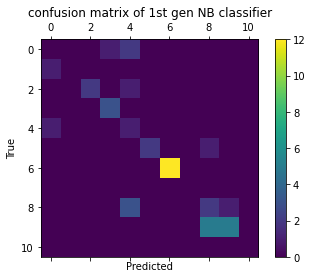

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 432x288 with 0 Axes>

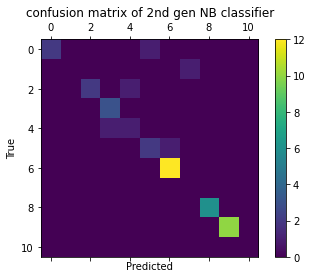

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 432x288 with 0 Axes>

In [48]:
print(y_val_all)
print(gen1_acc_list)

# matrix of results
results = [np.mean(gen1_acc_list), np.mean(gen1_prec_list), np.mean(gen1_rec_list),
                np.mean(gen2_acc_list), np.mean(gen2_prec_list),
                           np.mean(gen2_rec_list)]


print(results)    
   

# confusion matrix
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cm = confusion_matrix(y_val_all, gen1_pred_list, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('confusion matrix of 1st gen NB classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(labels)
plt.savefig('gen1_corrmatrix_results.png')


 # confusion matrix
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cm = confusion_matrix(y_val_all, gen2_pred_list, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('confusion matrix of 2nd gen NB classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(labels)
plt.savefig('gen2_corrmatrix_results.png')
    
    
    

image processor activated! use 'process_image_to_df()' to get back a pandas df
there are 2 lego images in list
kinect has acquired the image with shape = (540, 1845, 3)
kinect has acquired the image with shape = (540, 1845, 3)


IndexError: list index out of range

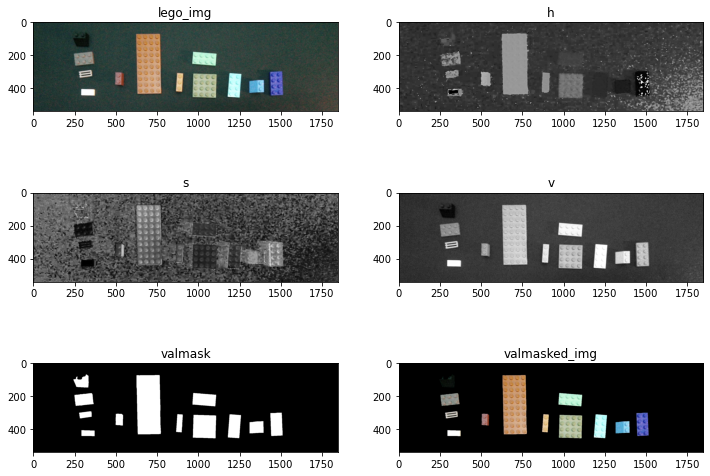

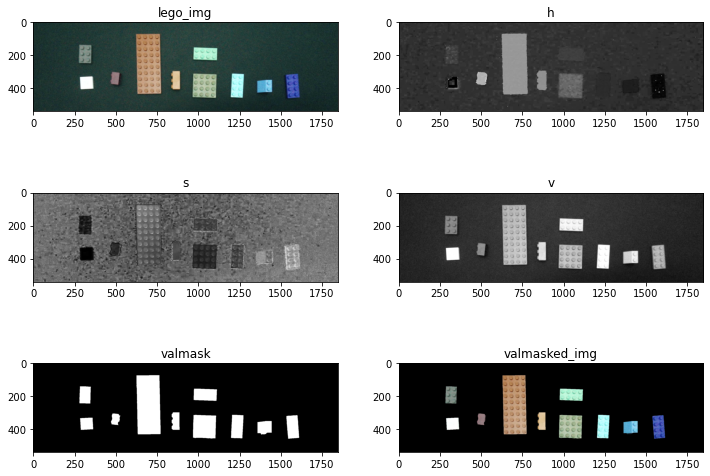

In [51]:
from pylegoclassifier import NaiveBayes, MatlabSurrogate, ImageProcess
from os import listdir
from os.path import isfile, join
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import morphology

def plot_images(titles, images, fsize = 12):
    
    length = int(len(titles) / 2) + 1
    fig = plt.figure(figsize=(fsize,fsize))

    for i in range(len(titles)):
        ax  = fig.add_subplot(length, 2, i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
#         plt.xticks([]), plt.yticks([])


matlab = MatlabSurrogate()
imageproc = ImageProcess()
# nb = NaiveBayes()
# print(type(nb))

# load model from pickle jar

# get our raw images into a list
raw_img_path = "images/test/"
lego_imgs = [(raw_img_path + f) for f in listdir(raw_img_path) if isfile(join(raw_img_path, f))]
print(f"there are {len(lego_imgs)} lego images in list")


for idx in range(15):


    lego_img = matlab.acquire_kinect_image(lego_imgs[idx])


    lego_img = cv.cvtColor(lego_img, cv.COLOR_BGR2HSV)

    ###################### do some weird saturation tricks
    h, s, v = cv.split(lego_img)
    h2 = h.astype(np.uint8)
    s2 = (s * .5).astype(np.uint8)
    v2 = (v * .8).astype(np.uint8)


    s2 = ndimage.median_filter(s2, size=(3, 3)).astype(np.uint8)

    s2 = ndimage.gaussian_filter(s2, sigma=5)

    # # erode the mask
    # hsv_mask = morphology.erosion(hsv_mask, morphology.disk(3))

    # #             # median filter to despeckle
    # #             

    # # binary dilation 
    # hsv_mask = morphology.binary_dilation(hsv_mask, np.ones((20, 20))).astype(np.uint8)

    # # fill the holes
    # hsv_mask = ndimage.binary_fill_holes(hsv_mask).astype(np.uint8)

    # # erode the mask
    # hsv_mask = morphology.erosion(hsv_mask, morphology.disk(5))


    ################## weird value tricks
    # # show a histogram
    # plt.hist(v, bins= [0,50,100,150,200,255])
    # plt.title("histogram of v values")
    # plt.show()


    low_mask = np.where(v < 30, 1, 0)
    high_mask = np.where(v > 120, 1, 0)
    valmask = low_mask + high_mask
    # valmask = ndimage.gaussian_filter(valmask, sigma=3)
    valmask = ndimage.median_filter(valmask, size=(5, 5)).astype(np.uint8)
    valmask = morphology.binary_dilation(valmask, np.ones((10, 10))).astype(np.uint8)
    valmask = morphology.erosion(valmask, morphology.disk(7))
    valmask = ndimage.binary_fill_holes(valmask).astype(np.uint8)





    ####################################### put it back together for showing the images
    sat_img = cv.merge((h2, s2, v2))

    #back to bgr
    lego_img = cv.cvtColor(lego_img, cv.COLOR_HSV2BGR)
    sat_img = cv.cvtColor(lego_img, cv.COLOR_HSV2BGR)
    valmasked_img = cv.bitwise_and(lego_img, lego_img, mask=valmask).astype(np.uint8)

    images = [lego_img, h, s,v, valmask, valmasked_img]
    titles = ["lego_img", "h", "s","v", "valmask", "valmasked_img"]
    plot_images(titles, images)

    # result_image = imageproc.process_image_make_predictions(lego_img, nb_model)














# #export the image back to matlab
# # but we show it here
# matlab.imshow(result_image, imdiv=1)
            


In [ ]:
############# novel data

from pylegoclassifier import NaiveBayes, MatlabSurrogate, ImageProcess
from os import listdir
from os.path import isfile, join
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy import ndimage
from skimage import morphology
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from seaborn import heatmap

# load class instances
matlab = MatlabSurrogate()
imageproc = ImageProcess()

class_dict = {0:"medium_blue",
              1:"black",
              2:"dark_stone_gray",
              3:"bright_green",
              4:"med_yel_green",
              5:"bright_orange",
              6:"bright_red",
              7:"bright_blue",
              8:"white",
              9:"bright_yellow"}


# get our raw images into a list
raw_img_path = "images/test/"
lego_imgs = [(raw_img_path + f) for f in listdir(raw_img_path) if isfile(join(raw_img_path, f))]
print(f"there are {len(lego_imgs)} lego images in list")
print(lego_imgs)


for idx in range(len(lego_imgs)):
    # acquire image
    lego_img = matlab.acquire_kinect_image(lego_imgs[idx])
    
    # load validation information for this image
    file_fragment = lego_imgs[idx].split(".")[0].split("/")[2]

    ##################################### first gen ####################################
    # draw information from image
    result_image, predicted = imageproc.process_image_make_predictions(lego_img, nb_model1)
    print(f"1stgen {lego_imgs[idx]} pred len {len(predicted)} vs validat len {len(y_val)}")
    
    # send image back to matlab
    cv.imwrite(f"images/results/{file_fragment}_1stgen_results.png", result_image)

    # use predictions list to calculate how well we did on validation
    
    # results
    acc = accuracy_score(y_val, predicted)
    prec = precision_score(y_val, predicted, average="micro")
    rec = recall_score(y_val, predicted, average="micro")
    print(f"precision is {prec}, recall is {rec}, accuracy = {acc}")
    
    
    gen1_acc_list.append(acc)
    gen1_prec_list.append(prec)
    gen1_rec_list.append(rec)
    for pred in predicted:
        gen1_pred_list.append(pred)
    
#     columns = np.unique(predicted)
#     index = np.unique(y_val)
    
#     cm = pd.DataFrame(confusion_matrix(y_val, predicted))
#     print(cm)
# #     heatmap(cm, annot=True)
    
    #################################### second gen #######################################
    # draw information from image
    result_image, predicted = imageproc.process_image_make_predictions(lego_img, nb_model2)
    print(f"2ndgen {lego_imgs[idx]} pred len {len(predicted)} vs validat len {len(y_val)}")
    
    # send image back to matlab
    cv.imwrite(f"images/results/{file_fragment}_2ndgen_results.png", result_image)

   # results
    acc = accuracy_score(y_val, predicted)
    prec = precision_score(y_val, predicted, average="micro")
    rec = recall_score(y_val, predicted, average="micro")
    print(f"precision is {prec}, recall is {rec}, accuracy = {acc}")
    
    gen2_acc_list.append(acc)
    gen2_prec_list.append(prec)
    gen2_rec_list.append(rec)
    
    for pred in predicted:
        gen2_pred_list.append(pred)
        